In [148]:
pip install imbalanced-learn

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Dataset:

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of
Information and Computer Science.

Donated by: P. Savicky Institute of Computer Science, AS of CR Czech Republic savicky '@' cs.cas.cz

In [150]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fdist","class"]
df =pd.read_csv("magic04.data", names=cols)
df.head()
df["class"].unique()

array(['g', 'h'], dtype=object)

In [151]:
df["class"]=(df["class"]=="g").astype(int)
df.head(20)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fdist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,1
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,1
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,1
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,1
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,1


**Objetivo**: Hacer un modelo de machin learning que pueda predeci si se presentara una clase g o una clase h

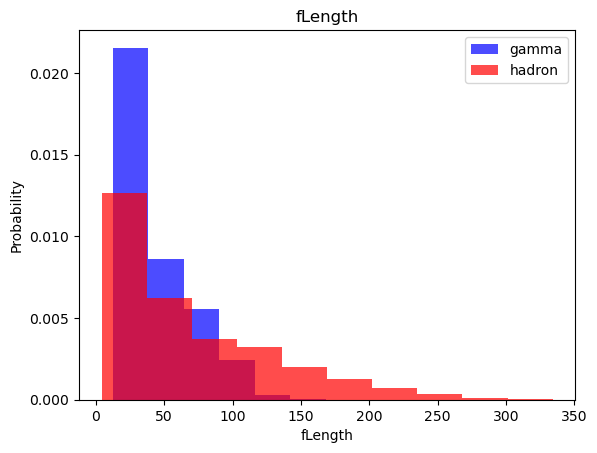

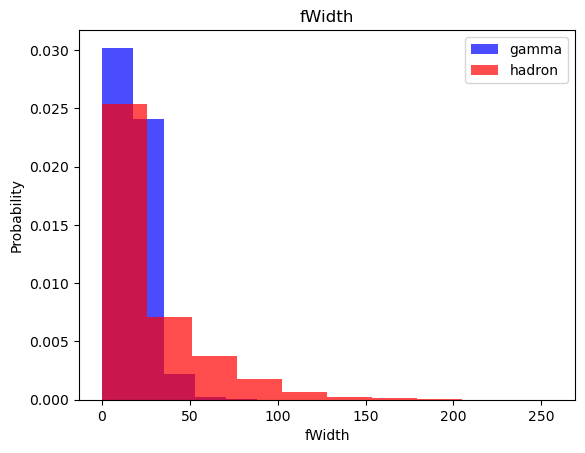

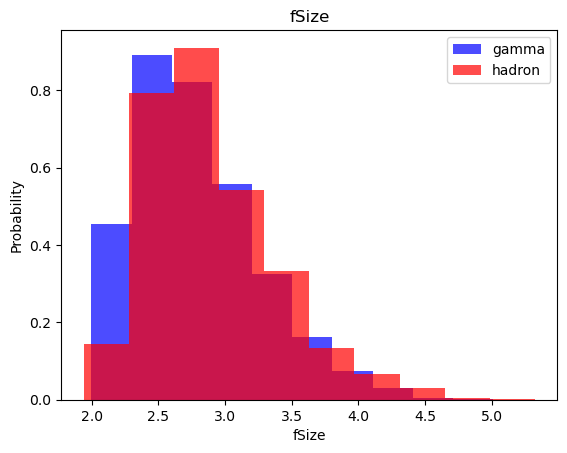

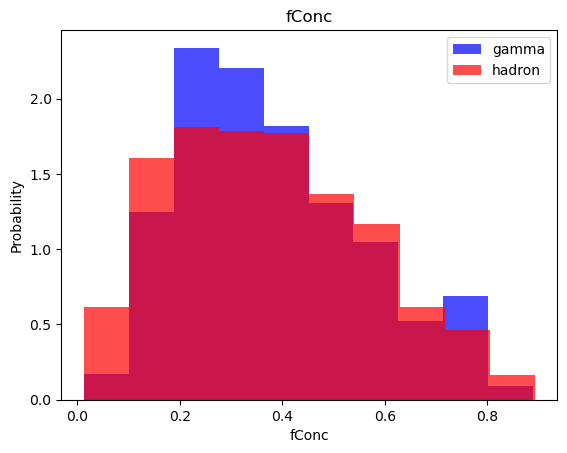

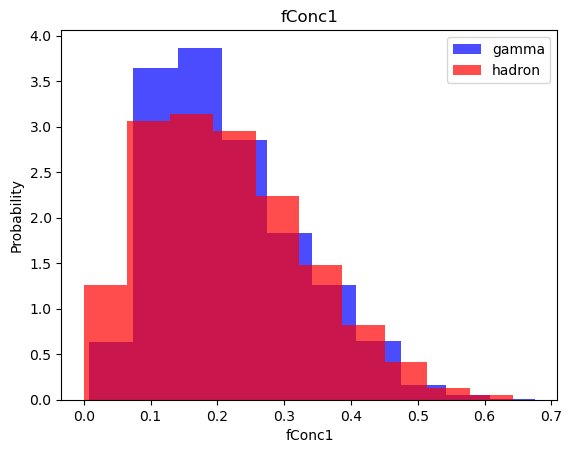

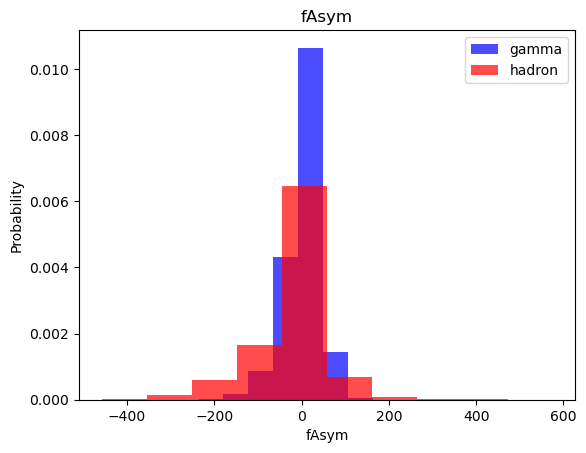

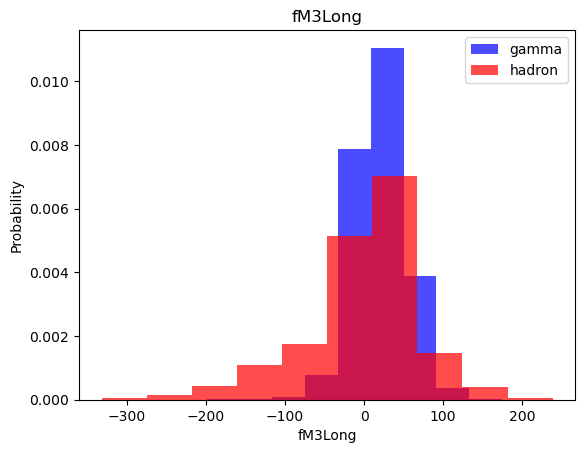

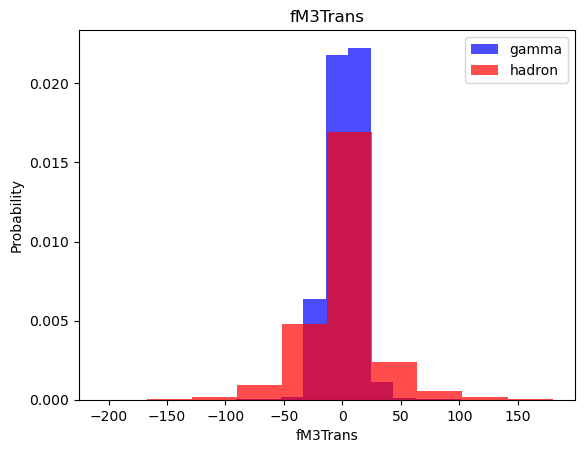

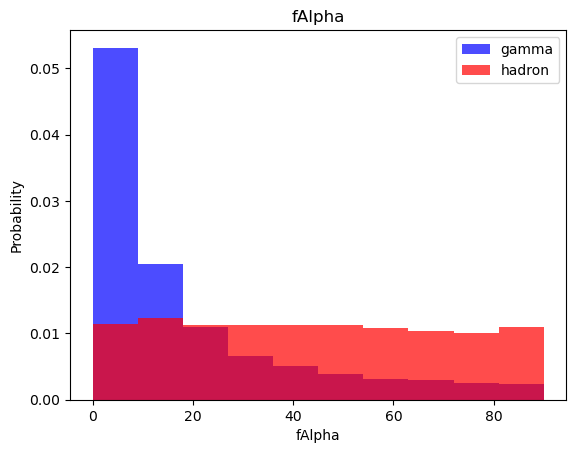

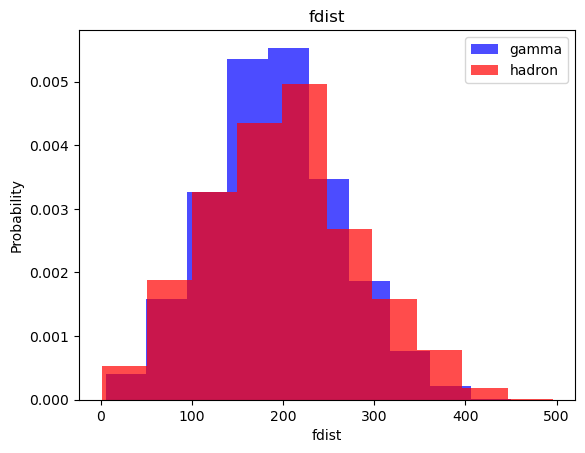

In [152]:
for label in df.columns[:-1]:
    plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=0.7,density=True)#Density= true normnaliza los datos, permitiendo comparaaciones
    plt.hist(df[df['class']==0][label],color='red',label='hadron',alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

### Train,validation, test datasets

In [153]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

c:\Users\mateo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


df.sample(frac=1): This randomly shuffles the rows of the DataFrame (df). frac=1 means it takes the entire DataFrame, essentially shuffling all its rows.

np.split(...): This function from NumPy (np) is used to split an array or DataFrame into multiple sub-arrays or DataFrames. In this case, it's splitting the shuffled DataFrame into three parts.

[int(0.6*len(df)), int(0.8*len(df))]: This is the argument passed to np.split(...), specifying the indices at which to split the DataFrame.

int(0.6*len(df)): This calculates the index at which 60% of the DataFrame ends, which represents the split between the training and validation datasets.

int(0.8*len(df)): This calculates the index at which 80% of the DataFrame ends, which represents the split between the validation and test datasets.

in summary:

The training dataset contains 60% of the shuffled DataFrame.

The validation dataset contains 20% of the shuffled DataFrame.

The test dataset contains the remaining 20% of the shuffled DataFrame.

In [154]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)#This line standardizes the features (X) using the fit_transform method of the scaler object.

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)#This line oversamples the dataset using the fit_resample method of the ros object. It balances the classes in the target variable (y) by duplicating or generating new samples from the minority class to match the majority class.

  data = np.hstack((X, np.reshape(y, (-1, 1))))#This concatenates the standardized features (X) with the target variable (y) and reshapes y to ensure proper alignment.

  return data, X, y

 ### Standardization:
 It transforms the data to have a mean of 0 and a standard deviation of 1. This process doesn't change the shape of the distribution of the data but ensures that the features have the same scale
 
 How StandardScaler works:
 
   - Calculate Mean and Standard Deviation: The StandardScaler computes the mean and standard deviation of each feature in the dataset during the fitting phase.
    
   - Transform Data: After computing the mean and standard deviation, it scales each feature by subtracting the mean and then dividing by the standard deviation. 
### Oversampling
Oversampling is a technique used in machine learning to address class imbalance in datasets, where one class (the minority class) is significantly underrepresented compared to another class (the majority class). In oversampling, new instances are generated for the minority class to balance its representation with the majority class.

**Random Oversampling**: This technique randomly selects instances from the minority class and duplicates them until the classes are balanced.

In [155]:
print("Before oversampling")
print("gamma :",len(train[train["class"] == 1])) # gamma
print("hadron :",len(train[train["class"] == 0]))
print("After oversampling")
train, X_train, y_train= scale_dataset(train,oversample=True)
print("gamma :", sum(y_train == 1))
print("hadron : ",sum(y_train == 0))

Before oversampling
gamma : 7366
hadron : 4046
After oversampling
gamma : 7366
hadron :  7366


In [156]:
#train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# K nearest Neighbors Model
K-Nearest Neighbors (KNN) is a simple and versatile supervised learning algorithm used for classification and regression tasks. Unlike other algorithms that learn a model during training, KNN stores all available cases and classifies new cases based on a similarity measure.
**How it Works**:
- **No Explicit Training Phase**: KNN doesn't explicitly learn a model during training. Instead, it memorizes the training instances (features and labels).

- **Prediction Phase**: When a new instance needs to be classified (or predicted), KNN finds the K nearest neighbors from the training dataset based on a similarity measure (often Euclidean distance) between the features of the new instance and those of the existing instances.

- **Majority Voting (Classification) or Averaging (Regression)**: For classification tasks, KNN predicts the class label of the new instance based on the majority class among its K nearest neighbors. For regression tasks, it predicts the target value by averaging the target values of its K nearest neighbors.

In [157]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialize KNN classifier with 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the training data
knn_model.fit(X_train, y_train)

# Predict labels for the test data
y_pred = knn_model.predict(X_test)

# Print classification report showing precision, recall, F1-score, and support
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1360
           1       0.85      0.88      0.87      2444

    accuracy                           0.83      3804
   macro avg       0.81      0.80      0.81      3804
weighted avg       0.82      0.83      0.82      3804



<div style="display: flex;">
    <div style="flex: 1; margin-right: 20px;">
        <img src="./asse/Precisionrecall.png" width="400" alt="Select Ollama models" />
    </div>
    <div style="flex: 1;">
        <h2>Explanation</h2>
        <p><strong>Precision</strong>: Precision measures the proportion of true positive predictions among all positive predictions made by the model. It is calculated as the ratio of true positives to the sum of true positives and false positives. Precision indicates how many of the instances predicted as positive are actually positive.</p>
        <p><strong>Recall</strong>: Recall (also known as sensitivity or true positive rate) measures the proportion of true positive predictions among all actual positive instances in the dataset. It is calculated as the ratio of true positives to the sum of true positives and false negatives. Recall indicates how many of the actual positive instances were correctly predicted by the model.</p>
        <p><strong>F1 Score</strong>: The F1 score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall.</p>
    </div>
</div>


# Naive Bayes
Naive Bayes is a probabilistic machine learning model used for classification tasks. It's based on Bayes' theorem, which calculates the probability of a hypothesis given the evidence.

**How it Works**:
1. **Training Phase**: During training, Naive Bayes learns the probability distribution of each feature given each class label from the training data.
2. **Prediction Phase**: When making predictions on new data, Naive Bayes calculates the probability of each class label given the features using Bayes' theorem. It selects the class label with the highest probability as the predicted label for the instance.

**Types of Naive Bayes**:

- **Gaussian Naive Bayes**: Assumes that features follow a Gaussian (normal) distribution.

- **Multinomial Naive Bayes**: Suitable for features that represent counts or frequencies (e.g., word counts in text classification).

- **Bernoulli Naive Bayes**: Applicable when features are binary (e.g., presence or absence of a word in text classification).

In [158]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Initialize Gaussian Naive Bayes classifier(the model follows a gaussian distribution)
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Predict labels for the test data
y_pred = nb_model.predict(X_test)

# Print classification report showing precision, recall, F1-score, and support
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.41      0.51      1360
           1       0.73      0.90      0.81      2444

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



# Log Regression
Logistic Regression is a type of supervised learning algorithm used for binary classification tasks, where the target variable (label) has two possible outcomes (e.g., 0 or 1, True or False).

**How it Works**:

- **Linear Model**: Despite its name, Logistic Regression is actually a linear model. It models the relationship between the independent variables (features) and the log-odds of the probability of the target variable belonging to a certain class.

- **Sigmoid Function**: Logistic Regression applies a sigmoid (or logistic) function to the linear combination of features to squash the output between 0 and 1, representing probabilities.
<img src="./asse/sigmoid-function.png" width="400" alt="Select Ollama models" />

   [Obteined from](https://www.codecademy.com/resources/docs/ai/neural-networks/sigmoid-activation-function)

- **Decision Boundary**: Logistic Regression uses a decision boundary (often a threshold of 0.5) to classify instances. If the predicted probability is above the threshold, the instance is classified as belonging to one class; otherwise, it's classified as belonging to the other class.

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize Logistic Regression classifier
lg_model = LogisticRegression()

# Train the model on the training data
lg_model.fit(X_train, y_train)

# Predict labels for the test data
y_pred = lg_model.predict(X_test)

# Print classification report showing precision, recall, F1-score, and support
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      1360
           1       0.84      0.83      0.84      2444

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# Support Vector Machines

Support Vector Machine (SVM) is a powerful supervised learning algorithm used for classification and regression tasks. It's particularly effective in high-dimensional spaces and when the number of features exceeds the number of samples.

1. Hyperplane: SVM aims to find the optimal hyperplane that separates the classes in the feature space. In a binary classification scenario, this hyperplane is the decision boundary that maximizes the margin between the closest data points (support vectors) of the two classes.
2. Margin: The margin is the distance between the hyperplane and the closest data points (support vectors). SVM seeks to maximize this margin, as it provides a greater level of confidence in the classification.
3. Kernel Trick: SVM can efficiently handle non-linear decision boundaries by transforming the input features into a higher-dimensional space using kernel functions (e.g., polynomial, radial basis function). This allows SVM to find a linear decision boundary in the transformed space, which corresponds to a non-linear decision boundary in the original feature space.

<div style="display: flex;">
    <div style="flex: 1; margin-right: 20px;">
        <img src="./asse/HYPERPLANE.jpeg" width="400" alt="Hyperplane Image" />
    </div>
    <div style="flex: 1; margin-left: 20px;">
        <img src="./asse/The-support-vector-machines-SVM-method-the-optimal-hyperplane-separates-the-two.png" width="400" alt="Optimal Hyperplane Image" />
    </div>
</div>


In [162]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize Support Vector Machine classifier
svm_model = SVC()

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Predict labels for the test data
y_pred = svm_model.predict(X_test)

# Print classification report showing precision, recall, F1-score, and support
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1360
           1       0.88      0.91      0.89      2444

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Networks


In [ ]:
# Importing required libraries
import tensorflow as tf  # TensorFlow library for building and training neural networks
import matplotlib.pyplot as plt  # Matplotlib library for plotting training history

# Function to plot the training history (loss and accuracy) of a neural network
def plot_history(history):
    # Creating subplots for loss and accuracy
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    # Plotting training and validation loss
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    # Plotting training and validation accuracy
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    # Displaying the plot
    plt.show()

# Function to train a neural network model
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    # Creating a sequential model
    nn_model = tf.keras.Sequential([
        # Adding a dense layer with ReLU activation and input shape of (10,)
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        # Adding a dropout layer with dropout probability
        tf.keras.layers.Dropout(dropout_prob),
        # Adding another dense layer with ReLU activation
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        # Adding another dropout layer
        tf.keras.layers.Dropout(dropout_prob),
        # Adding the output layer with sigmoid activation for binary classification
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compiling the model with Adam optimizer, binary crossentropy loss, and accuracy metric
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                     metrics=['accuracy'])

    # Training the model
    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )

    # Returning the trained model and its history
    return nn_model, history



1. **X_train, y_train**:
   - `X_train` represents the input features or independent variables of your dataset. Each row typically corresponds to one data point, and each column represents a feature.
   - `y_train` represents the labels or target variables corresponding to the input features in `X_train`. For classification tasks, `y_train` contains the class labels or categories for each data point in `X_train`.

2. **num_nodes**:
   - This parameter defines the number of nodes or neurons in each hidden layer of the neural network.
   - In a neural network, each layer consists of nodes or neurons. The number of nodes in a layer determines the complexity and capacity of the model to learn patterns from the data.

3. **dropout_prob**:
   - Dropout is a regularization technique used to prevent overfitting in neural networks.
   - `dropout_prob` specifies the probability of randomly setting a fraction of input units to 0 at each update during training. This helps in preventing the model from relying too much on specific features or neurons, thus improving generalization.

4. **lr** (Learning Rate):
   - Learning rate is a hyperparameter that controls the step size during the optimization process.
   - It determines how much the model parameters are adjusted during training in response to the estimated error. A higher learning rate may result in faster convergence but can also lead to overshooting the minimum. On the other hand, a lower learning rate may require more iterations for convergence but can provide better accuracy.

5. **batch_size**:
   - Batch size refers to the number of training examples utilized in one iteration.
   - During training, the dataset is divided into batches, and each batch is processed sequentially by the neural network. The gradients are computed for each batch, and the model parameters are updated accordingly.
   - Using mini-batches (batch_size < number of training examples) helps in reducing memory usage and speeding up the training process.

6. **epochs**:
   - An epoch refers to one complete pass through the entire training dataset.
   - Training a neural network involves iterating over the entire dataset multiple times (epochs) to update the model parameters and improve its performance.
   - Increasing the number of epochs allows the model to see the data multiple times, potentially improving its ability to generalize to new, unseen data. However, too many epochs can lead to overfitting if the model starts memorizing the training data instead of learning underlying patterns.

7. **nn_model**:
   - `nn_model` represents the neural network model that has been trained on the input data (`X_train`, `y_train`) using the specified hyperparameters.
   - It is created using TensorFlow's `Sequential` API, which allows you to build a neural network model layer by layer in a sequential manner.
   - The architecture of `nn_model` consists of:
     - Input layer: A dense layer with ReLU activation function and an input shape of `(10,)`, indicating that the input data has 10 features.
     - Dropout layer: Helps in regularization by randomly dropping a fraction of input units during training to prevent overfitting.
     - Hidden layer: Another dense layer with ReLU activation function.
     - Another Dropout layer for regularization.
     - Output layer: A dense layer with a single neuron and sigmoid activation function, suitable for binary classification tasks. It outputs the probability of the input belonging to the positive class.

8. **history**:
   - `history` is a TensorFlow object that contains information about the training process and the performance of the model during training.
   - It includes metrics such as loss and accuracy recorded at the end of each epoch during training on both the training and validation datasets.
   - The history object has attributes like `history.history['loss']`(**"loss" refers to a measure of how well the model is performing on the training data. It quantifies the difference between the predicted output of the model and the actual target values in the training dataset**), `history.history['accuracy']`, `history.history['val_loss']`(**The validation loss indicates how well the model is generalizing to unseen data. A decreasing validation loss over successive epochs suggests that the model is improving its performance on the validation set**), and `history.history['val_accuracy']`(**Validation accuracy indicates the proportion of correctly predicted labels in the validation dataset.**) that store the values of loss and accuracy metrics for training and validation sets across epochs.
   - These metrics can be used to evaluate the performance of the model, monitor training progress, and identify potential issues such as overfitting or underfitting.


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

In [ ]:
print(classification_report(y_test, y_pred))